In [1]:
import os,sys
import pandas as pd
import numpy as np
from sklearn import metrics
import networkx as nx
from scipy import stats
from sklearn import cluster
from sklearn import neighbors
from brewer2mpl import qualitative
import  community
# import geopandas as gpd

sys.path.append('../code')
import pop_graph as popg

# graphics stuff
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9.5,9.5
# rcParams['figure.dpi'] = 300

In [2]:
# load data
dat = pd.read_csv('../data/demo/nyc_example_coney.csv', index_col = 0)
dat.head()

in_married_fam_or_couple_hh  in_other_fam_hh  in_nfam_hh  \
36047032600                            1                0           0   
36047032600                            1                0           0   
36047032600                            1                0           0   
36047032600                            1                0           0   
36047032600                            1                0           0   

             living_alone  in_group_quarters  age_05_under  age_06_17  \
36047032600             0                  0             0          0   
36047032600             0                  0             0          0   
36047032600             0                  0             0          0   
36047032600             0                  0             0          0   
36047032600             0                  0             0          0   

             age_18_24  age_25_34  age_35_64             ...              \
36047032600          0          0          1             ...               
36047032600          0          0          1             ...               
36047032600          0          0          1             ...               
36047032600          0          0          1             ...               
36047032600          0          0          1             ...               

             somewhat_above_poverty  well_above_poverty  White_alone  \
36047032600                       0                   1            1   
36047032600                       0                   1            1   
36047032600                       0                   1            1   
36047032600                       0                   1            1   
36047032600                       0                   1            1   

             Black_or_African_American_alone  Asian_alone  Hispanic_or_Latino  \
36047032600                                0            0                   0   
36047032600                                0            0                   0   
36047032600                                0            0                   0   
36047032600                                0            0                   0   
36047032600                                0            0                   0   

             foreign_born  lang_not_eng_at_home  not_a_US_citizen  \
36047032600             1                     1                 0   
36047032600             1                     1                 0   
36047032600             1                     1                 0   
36047032600             1                     1                 0   
36047032600             1                     1                 0   

             limited_english_proficient  
36047032600                           1  
36047032600                           1  
36047032600                           1  
36047032600                           1  
36047032600                           1  

[5 rows x 23 columns]

In [3]:
# target locations
locs = pd.unique(dat.index)

In [6]:
# generate tract-level co-occurrence matrices/population graphs (takes a moment)
loc_g = popg.build_pop_graphs(dat = dat, locs = locs, verbose = False)

## Single Location

In [8]:
# Census Tract 326 in Coney Island
target_loc = locs[0]
target_loc

36047032600

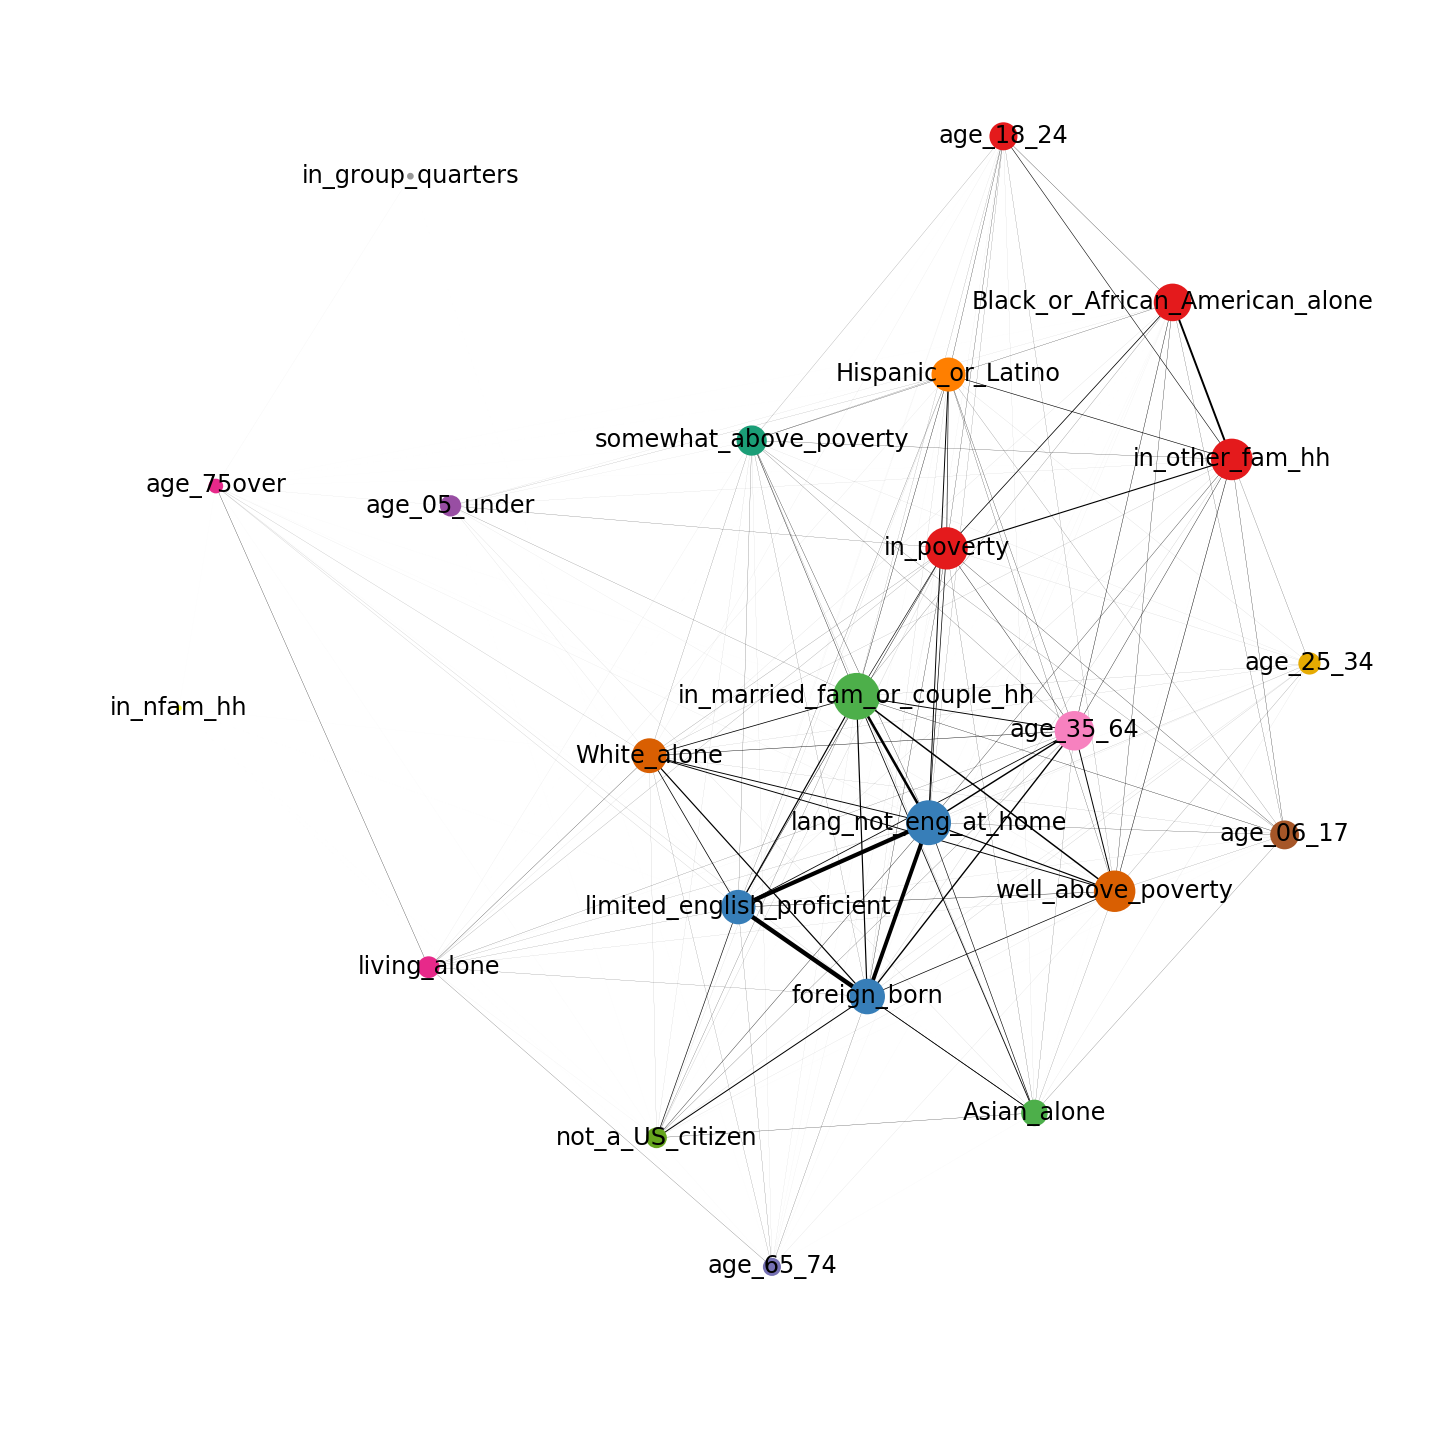

In [15]:
np.random.seed(303)
popg.drawPopGraph(G = loc_g[target_loc][0], part = loc_g[target_loc][1], tcl = dat[dat.index == target_loc])